In [1]:
import pandas as pd
import requests

In [3]:
APIkey="978cb90dac43d30cae107f64d2bc15ec"

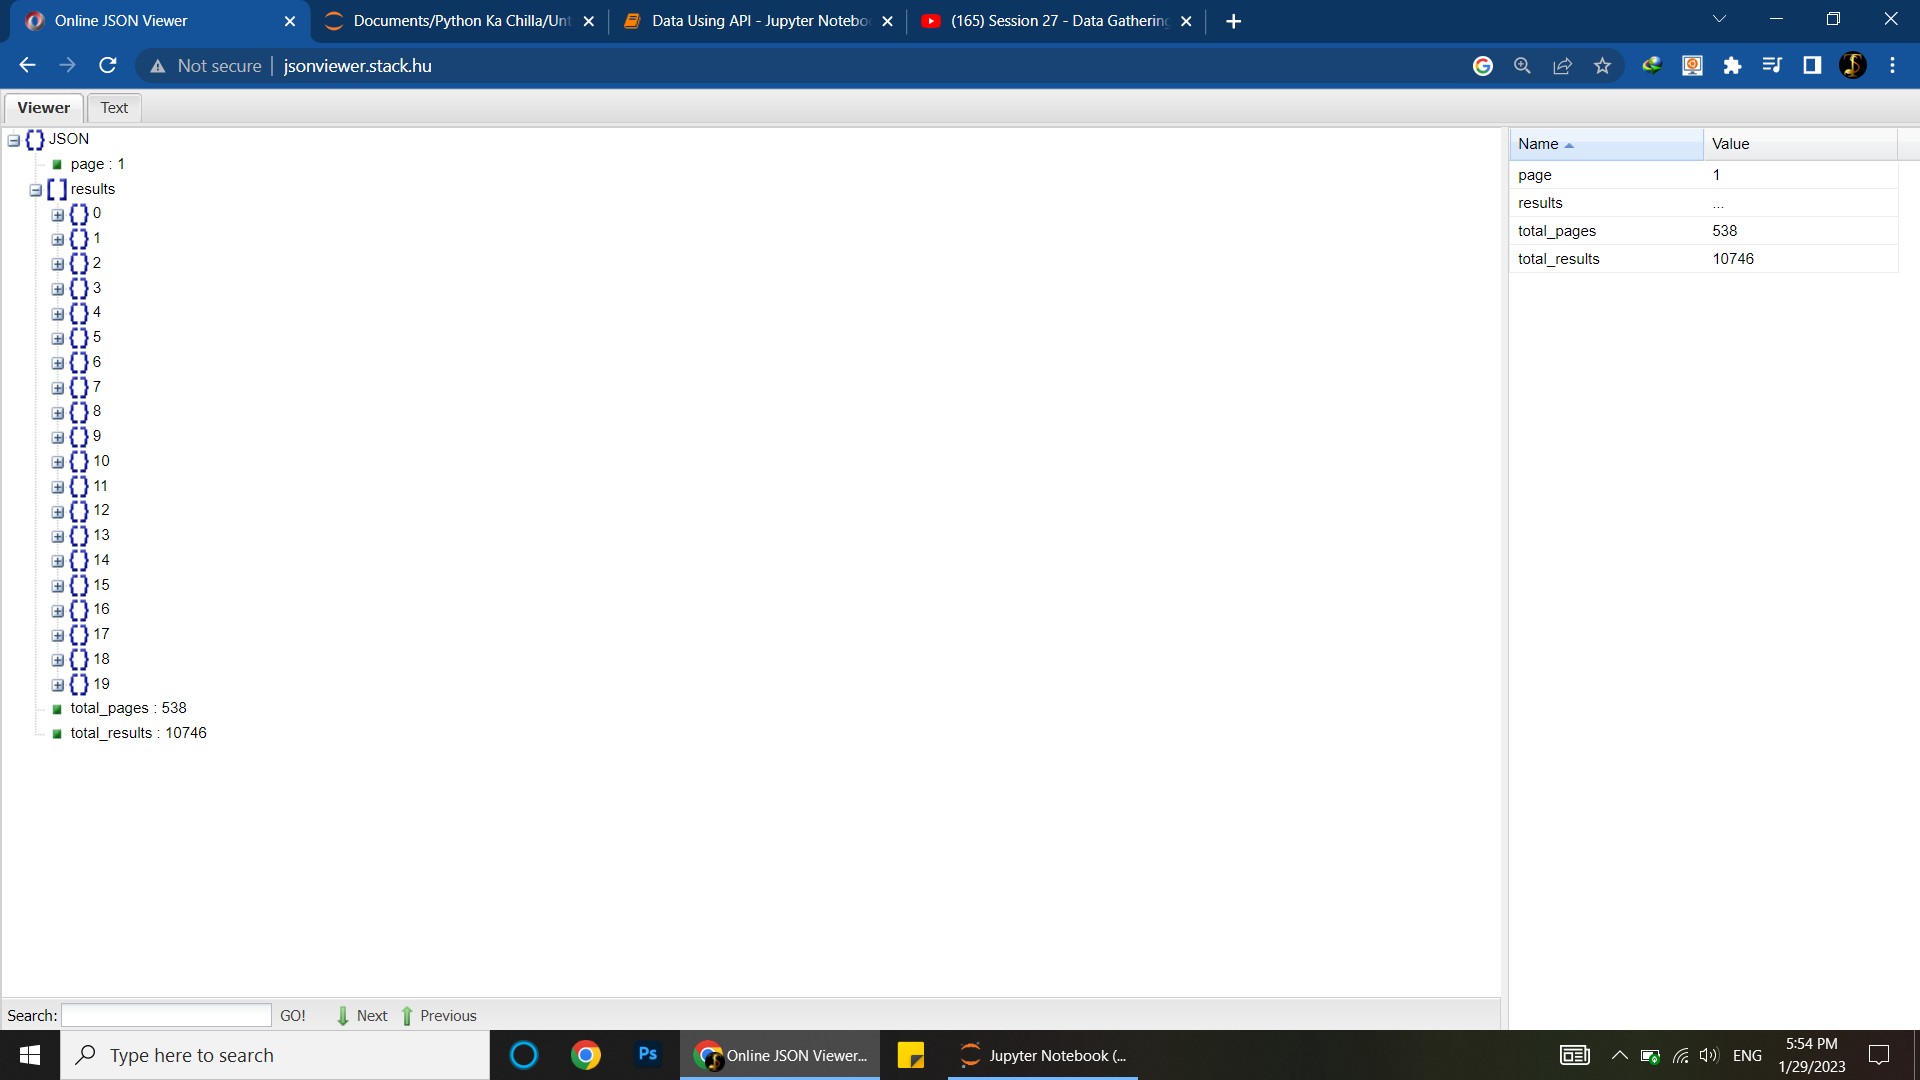

In [5]:
url="https://api.themoviedb.org/3/movie/top_rated?api_key=978cb90dac43d30cae107f64d2bc15ec&language=en-US&page=1"
response = requests.get(url)
response

<Response [200]>

In [7]:
#response is dictionary, results is the key
response.json()["results"]

[{'adult': False,
  'backdrop_path': '/tmU7GeKVybMWFButWEGl2M4GeiP.jpg',
  'genre_ids': [18, 80],
  'id': 238,
  'original_language': 'en',
  'original_title': 'The Godfather',
  'overview': 'Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.',
  'popularity': 104.313,
  'poster_path': '/3bhkrj58Vtu7enYsRolD1fZdja1.jpg',
  'release_date': '1972-03-14',
  'title': 'The Godfather',
  'video': False,
  'vote_average': 8.7,
  'vote_count': 17370},
 {'adult': False,
  'backdrop_path': '/wPU78OPN4BYEgWYdXyg0phMee64.jpg',
  'genre_ids': [18, 80],
  'id': 278,
  'original_language': 'en',
  'original_title': 'The Shawshank Redemption',
  'overview': 'Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy 

In [12]:
df = pd.DataFrame(response.json()["results"])[["id","title","overview","popularity","vote_average"]]
df.head()

id                         title  \
0     238                 The Godfather   
1     278      The Shawshank Redemption   
2     240         The Godfather Part II   
3  315162  Puss in Boots: The Last Wish   
4     424              Schindler's List   

                                            overview  popularity  vote_average  
0  Spanning the years 1945 to 1955, a chronicle o...     104.313           8.7  
1  Framed in the 1940s for the double murder of h...     109.584           8.7  
2  In the continuing saga of the Corleone crime f...      77.755           8.6  
3  Puss in Boots discovers that his passion for a...    6660.227           8.6  
4  The true story of how businessman Oskar Schind...      72.243           8.6

## Total 538 pages 

In [22]:
df=pd.DataFrame()
tempdf = pd.DataFrame()

In [35]:

for i in range(1,39):
    url="https://api.themoviedb.org/3/movie/top_rated?api_key=978cb90dac43d30cae107f64d2bc15ec&language=en-US&page={}".format(i)
    response = requests.get(url)
    tempdf = pd.DataFrame(response.json()["results"])[["id","title","overview","popularity","vote_average"]]
    df = df.append(tempdf , ignore_index= True)

In [15]:
# ignore index set the index on its own rather than accepting of each response,
# in other case, index will start again from 0 for each new page

In [36]:
df.head()

id                         title  \
0     238                 The Godfather   
1     278      The Shawshank Redemption   
2     240         The Godfather Part II   
3  315162  Puss in Boots: The Last Wish   
4     424              Schindler's List   

                                            overview  popularity  vote_average  
0  Spanning the years 1945 to 1955, a chronicle o...     104.313           8.7  
1  Framed in the 1940s for the double murder of h...     109.584           8.7  
2  In the continuing saga of the Corleone crime f...      77.755           8.6  
3  Puss in Boots discovers that his passion for a...    6660.227           8.6  
4  The true story of how businessman Oskar Schind...      72.243           8.6

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            760 non-null    int64  
 1   title         760 non-null    object 
 2   overview      760 non-null    object 
 3   popularity    760 non-null    float64
 4   vote_average  760 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 29.8+ KB


In [38]:
df.isnull().sum()

id              0
title           0
overview        0
popularity      0
vote_average    0
dtype: int64